<a href="https://colab.research.google.com/github/abidhikri/tugas13/blob/main/Muhammad%20Abi%20Dhikri%20Alf.%20Tugas-14%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS PYTHON 14, MUHAMMAD ABI DHIKRI ALFADILLAH

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cos(frk,tp,ht,hr,d):
    if frk in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frk in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tp=='urbn' :
        Cm=0
    elif tp=='suburbn' :
        Cm= -2*((np.log10((frk/28)**2))-5.4)
    elif tp=='open' :
        Cm= -4.78*(np.log10(frk))+18.33*(np.log10(frk))-40.94
    else :
        Cm='salah'
    
    ahr = (1.1*np.log10(frk)-0.7)*hr-(1.56*np.log10(frk)-1.8)
    Lp = Ca+(Cb*np.log10(frk))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [9]:
f=1800 #MHz
loc1='urbn'
loc2='suburbn'
loc3='open'
towr=80 #m
usr=1.5 #m
dmin=200 #m
dmax=700 #m 
ptx= 30000 #miliwatt
Gtx= 10 #db
Grx= 2 #db
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [10]:
ntl = lambda x : 10*np.log10(x) #numerik(watt) ke logaritmik(dB)
ltn = lambda x : 10**(x/10) #logaritmik(dB) ke numerik(watt)

In [11]:
Ptx_convert= ntl(Ptx) #ubah daya pengirim ke bentuk logaritmik (dB)

In [12]:
def Prx(ptx,PL,gain_tr,gain_rv):
    Ptx_convert= ntl(ptx) 
    prx = Ptx_convert - (PL + gain_tr + gain_rv)
    Prx_convert= ltn(prx) #ubah daya terima ke bentuk numerik (miliWatt)

    return Prx_convert # miliwatt

# Grafik 1 - Frek. 1800 Mhz

In [14]:
LpUrbn=cos(f,loc1,towr,usr,d)
LpSuburbn=cos(f,loc2,towr,usr,d)
LpOpen=cos(f,loc3,towr,usr,d)

In [15]:
#nilai Prx tiap kawasan dalam miliwatt
Prx_Urbn=Prx(Ptx_convert,LpUrbn,Gtx,Grx )
Prx_Suburbn=Prx(Ptx_convert,LpSuburbn,Gtx,Grx)
Prx_Open=Prx(Ptx_convert,LpOpen,Gtx,Grx)

In [17]:
d_sort=d[np.argsort(d)]
Urbn_sort=Prx_Urbn[np.argsort(d)]
Suburbn_sort=Prx_Suburbn[np.argsort(d)]
Open_sort=Prx_Open[np.argsort(d)]

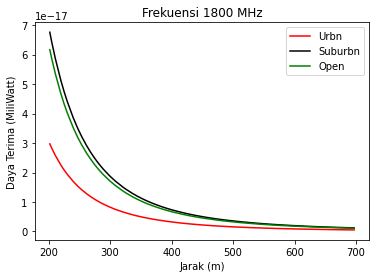

In [18]:
plt.figure()
plt.plot(d_sort,Urbn_sort,'r-', label='Urbn')
plt.plot(d_sort,Suburbn_sort,'k-', label='Suburbn')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (MiliWatt)')
plt.show()


In [19]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urbn'

In [20]:
LpUrbn1=cos(f1,loc,towr,usr,d)
LpUrbn2=cos(f2,loc,towr,usr,d)
LpUrbn3=cos(f3,loc,towr,usr,d)

In [21]:
Prx_Urbn1=Prx(Ptx_convert,LpUrbn1,Gtx,Grx )
Prx_Urbn2=Prx(Ptx_convert,LpUrbn2,Gtx,Grx)
Prx_Urbn3=Prx(Ptx_convert,LpUrbn3,Gtx,Grx)

In [22]:
d_sort=d[np.argsort(d)]
Urbn1_sort=Prx_Urbn1[np.argsort(d)]
Urbn2_sort=Prx_Urbn2[np.argsort(d)]
Urbn3_sort=Prx_Urbn3[np.argsort(d)]

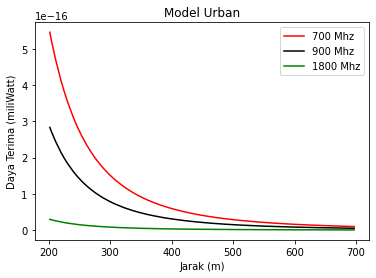

In [23]:
plt.figure()
plt.plot(d_sort,Urbn1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urbn2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urbn3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()


2.Perhitungan SNR

In [24]:
BW= 5000000 #Hz

In [32]:
def snr(Prx, bw):
  noise=-174 + ntl(bw)
  Noise=ltn(noise)
  SNR=Prx/Noise
  return SNR

In [33]:
SNR_Urbn=snr(Prx_Urbn,BW )
SNR_Suburbn=snr(Prx_Suburbn,BW)
SNR_Open=snr(Prx_Open,BW)

In [34]:
d_sort=d[np.argsort(d)]
snrUrbn_sort=SNR_Urbn[np.argsort(d)]
snrSuburbn_sort=SNR_Suburbn[np.argsort(d)]
snrOpen_sort=SNR_Open[np.argsort(d)]

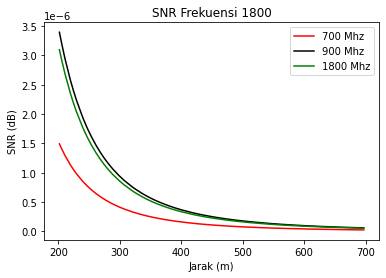

In [35]:
plt.figure()
plt.plot(d_sort,snrUrbn_sort,'r-', label='700 Mhz')
plt.plot(d_sort,snrSuburbn_sort,'k-', label='900 Mhz')
plt.plot(d_sort,snrOpen_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('SNR Frekuensi 1800')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

Grafik 1.2- Frekuensi 1800 Mhz

In [36]:
SNR_Urbn1=snr(Prx_Urbn1,BW )
SNR_Urbn2=snr(Prx_Urbn2,BW)
SNR_Urbn3=snr(Prx_Urbn3,BW)

In [37]:
d_sort=d[np.argsort(d)]
snrUrbn1_sort=SNR_Urbn1[np.argsort(d)]
snrUrbn2_sort=SNR_Urbn2[np.argsort(d)]
snrUrbn3_sort=SNR_Urbn3[np.argsort(d)]

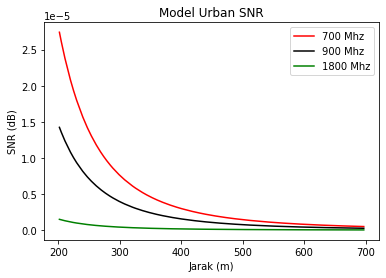

In [38]:
plt.figure()
plt.plot(d_sort,snrUrbn1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,snrUrbn2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,snrUrbn3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

3. Perhitungan Capacity

In [39]:
def C(Snr,Bw):
    capacity= Bw*np.log2(1+Snr)
    return capacity

Grafik 1.3 Frekuensi 1800

In [40]:
C_Urbn=C(SNR_Urbn,BW)
C_Suburbn=C(SNR_Suburbn,BW)
C_Open=C(SNR_Open,BW)

In [41]:
d_sort=d[np.argsort(d)]
UrbnC_sort=C_Urbn[np.argsort(d)]
SuburbnC_sort=C_Suburbn[np.argsort(d)]
OpenC_sort=C_Open[np.argsort(d)]

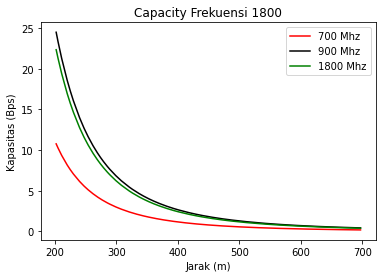

In [42]:
plt.figure()
plt.plot(d_sort,UrbnC_sort,'r-', label='700 Mhz')
plt.plot(d_sort,SuburbnC_sort,'k-', label='900 Mhz')
plt.plot(d_sort,OpenC_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Capacity Frekuensi 1800')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()

In [43]:
C_Urbn1=C(SNR_Urbn1,BW)
C_Urbn2=C(SNR_Urbn2,BW)
C_Urbn3=C(SNR_Urbn3,BW)

In [44]:
d_sort=d[np.argsort(d)]
UrbnC1_sort=C_Urbn1[np.argsort(d)]
UrbnC2_sort=C_Urbn2[np.argsort(d)]
UrbnC3_sort=C_Urbn3[np.argsort(d)]

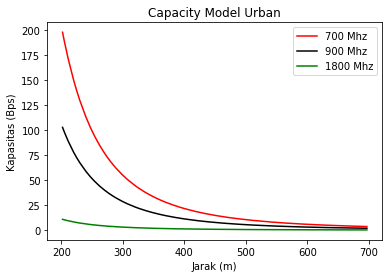

In [45]:
plt.figure()
plt.plot(d_sort,UrbnC1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,UrbnC2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,UrbnC3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Capacity Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()